In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [150]:
df = pd.read_csv("../datasets/customer-data.csv")
df = df.drop("id", axis=1)
df.head()

,age,gender,race,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,DUIs,past_accidents,outcome
0,65+,female,majority,0-9y,high school,upper class,0.629027,True,after 2015,False,True,10238,12000.0,sedan,0,0,0,False
1,16-25,male,majority,0-9y,none,poverty,0.357757,False,before 2015,False,False,10238,16000.0,sedan,0,0,0,True
2,16-25,female,majority,0-9y,high school,working class,0.493146,True,before 2015,False,False,10238,11000.0,sedan,0,0,0,False
3,16-25,male,majority,0-9y,university,working class,0.206013,True,before 2015,False,True,32765,11000.0,sedan,0,0,0,False
4,26-39,male,majority,10-19y,none,working class,0.388366,True,before 2015,False,False,32765,12000.0,sedan,2,0,1,True


In [151]:
df.loc[:, "credit_score"] = df.groupby("income")["credit_score"].transform(lambda x: x.fillna(x.mean()))
df.loc[:, "annual_mileage"] = df.groupby("driving_experience")["annual_mileage"].transform(lambda x: x.fillna(x.mean()))

df.head()

,age,gender,race,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,DUIs,past_accidents,outcome
0,65+,female,majority,0-9y,high school,upper class,0.629027,True,after 2015,False,True,10238,12000.0,sedan,0,0,0,False
1,16-25,male,majority,0-9y,none,poverty,0.357757,False,before 2015,False,False,10238,16000.0,sedan,0,0,0,True
2,16-25,female,majority,0-9y,high school,working class,0.493146,True,before 2015,False,False,10238,11000.0,sedan,0,0,0,False
3,16-25,male,majority,0-9y,university,working class,0.206013,True,before 2015,False,True,32765,11000.0,sedan,0,0,0,False
4,26-39,male,majority,10-19y,none,working class,0.388366,True,before 2015,False,False,32765,12000.0,sedan,2,0,1,True


In [152]:
postal_code_map = {
    10238: "New York",
    32765: "Florida",
    92101: "California",
    21217: "Maryland"
}

df["state"] = df["postal_code"].map(postal_code_map)
df = df.drop("postal_code", axis=1)
df.head()

,age,gender,race,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,annual_mileage,vehicle_type,speeding_violations,DUIs,past_accidents,outcome,state
0,65+,female,majority,0-9y,high school,upper class,0.629027,True,after 2015,False,True,12000.0,sedan,0,0,0,False,New York
1,16-25,male,majority,0-9y,none,poverty,0.357757,False,before 2015,False,False,16000.0,sedan,0,0,0,True,New York
2,16-25,female,majority,0-9y,high school,working class,0.493146,True,before 2015,False,False,11000.0,sedan,0,0,0,False,New York
3,16-25,male,majority,0-9y,university,working class,0.206013,True,before 2015,False,True,11000.0,sedan,0,0,0,False,Florida
4,26-39,male,majority,10-19y,none,working class,0.388366,True,before 2015,False,False,12000.0,sedan,2,0,1,True,Florida


In [153]:
df["DUIs"] = df["DUIs"].apply(lambda x: True if x > 0 else False)
df.head()

,age,gender,race,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,annual_mileage,vehicle_type,speeding_violations,DUIs,past_accidents,outcome,state
0,65+,female,majority,0-9y,high school,upper class,0.629027,True,after 2015,False,True,12000.0,sedan,0,False,0,False,New York
1,16-25,male,majority,0-9y,none,poverty,0.357757,False,before 2015,False,False,16000.0,sedan,0,False,0,True,New York
2,16-25,female,majority,0-9y,high school,working class,0.493146,True,before 2015,False,False,11000.0,sedan,0,False,0,False,New York
3,16-25,male,majority,0-9y,university,working class,0.206013,True,before 2015,False,True,11000.0,sedan,0,False,0,False,Florida
4,26-39,male,majority,10-19y,none,working class,0.388366,True,before 2015,False,False,12000.0,sedan,2,False,1,True,Florida


In [154]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
cat_cols = df.select_dtypes(include=["object"]).columns

In [155]:
blue = "#5081bd"
lightblue = "#82aacc"
grey = "#bfbfbf"
lightgrey = "#c4c4c3"

In [156]:
df["DUIs"].value_counts()

DUIs
False    8118
True     1882
Name: count, dtype: int64

In [157]:
1470 + 331 + 68 + 10 + 2 + 1

1882

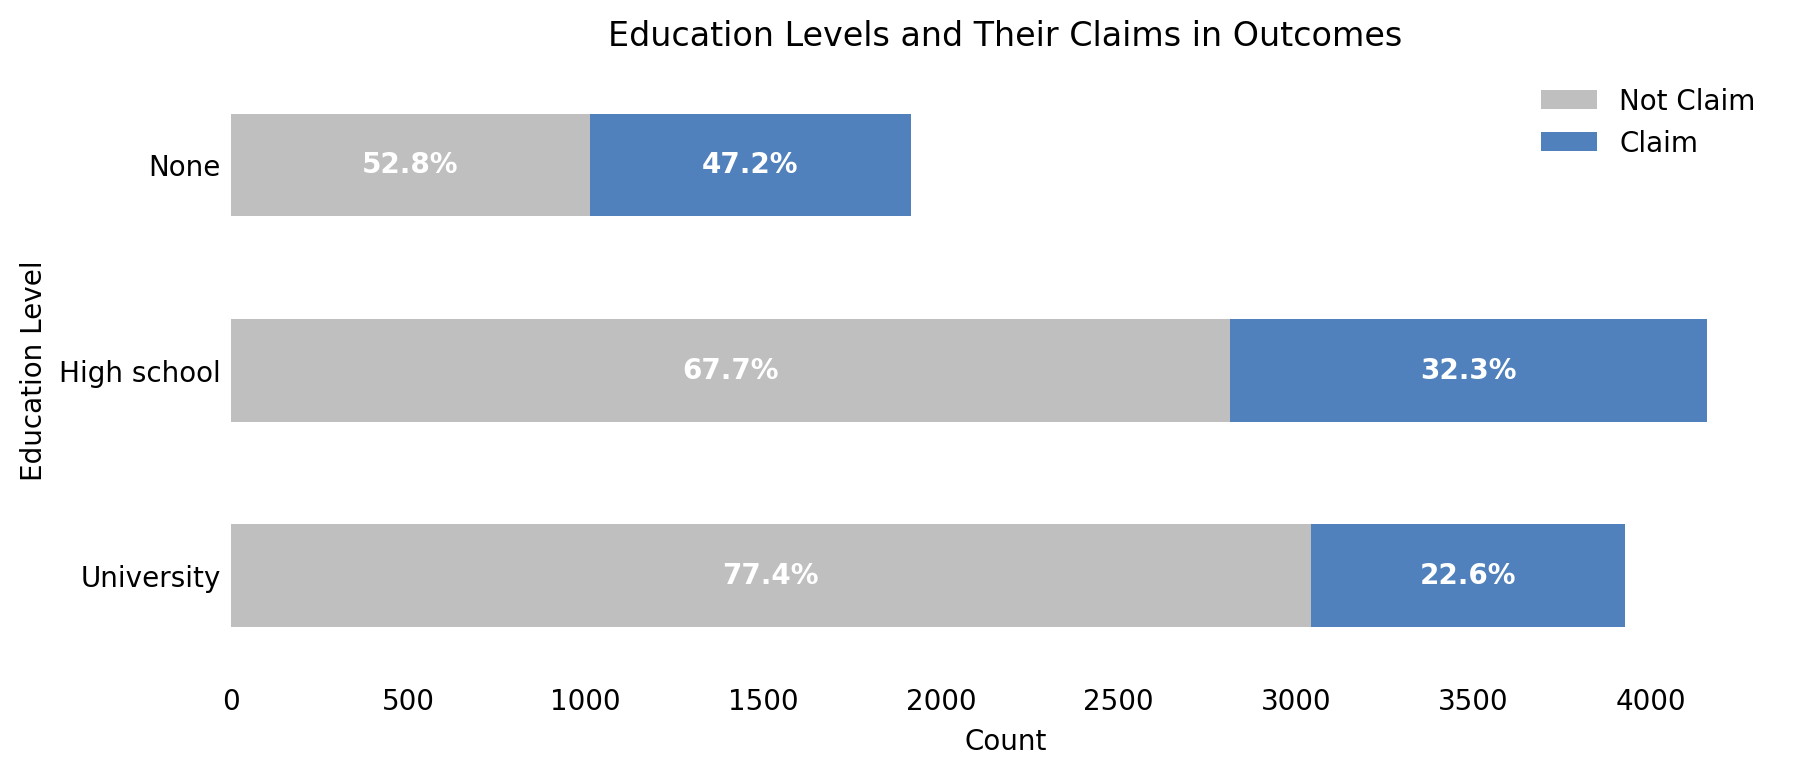

In [158]:
# Count occurrences of each combination of education and outcome
count_data = df.groupby(['education', 'outcome']).size().unstack(fill_value=0)

# Specify the order of the education levels
desired_order = ["none", "high school", "university"]

# Reindex the DataFrame to set the order
count_data = count_data.reindex(desired_order)

# Plotting
plt.figure(figsize=(10, 4), dpi=200)

# Create the stacked bar chart
ax = count_data.plot(kind='barh', stacked=True, ax=plt.gca(), color=[grey, blue])

# Show percentage inside each hue
for i in range(count_data.shape[0]):
    total_count = count_data.iloc[i].sum()  # Total count for the row
    for j in range(count_data.shape[1]):
        if count_data.iloc[i, j] > 0:
            percentage = (count_data.iloc[i, j] / total_count) * 100
            x_pos = count_data.iloc[i, :j].sum() + count_data.iloc[i, j] / 2
            ax.text(x_pos, i, f'{percentage:.1f}%', ha='center', va='center', color='white', fontweight='bold')  # Make percentage bold

# Customize the plot
plt.title('Education Levels and Their Claims in Outcomes')
plt.xlabel('Count')
plt.ylabel('Education Level')

# Capitalize y-tick labels
ax.set_yticklabels([label.capitalize() for label in count_data.index])

# Update legend and remove border
plt.legend(labels=['Not Claim', 'Claim'], frameon=False)
plt.xticks(rotation=0)
plt.gca().invert_yaxis()

# Remove left and bottom spines and their ticks
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='both', which='both', length=0)

# Show the plot
plt.show()

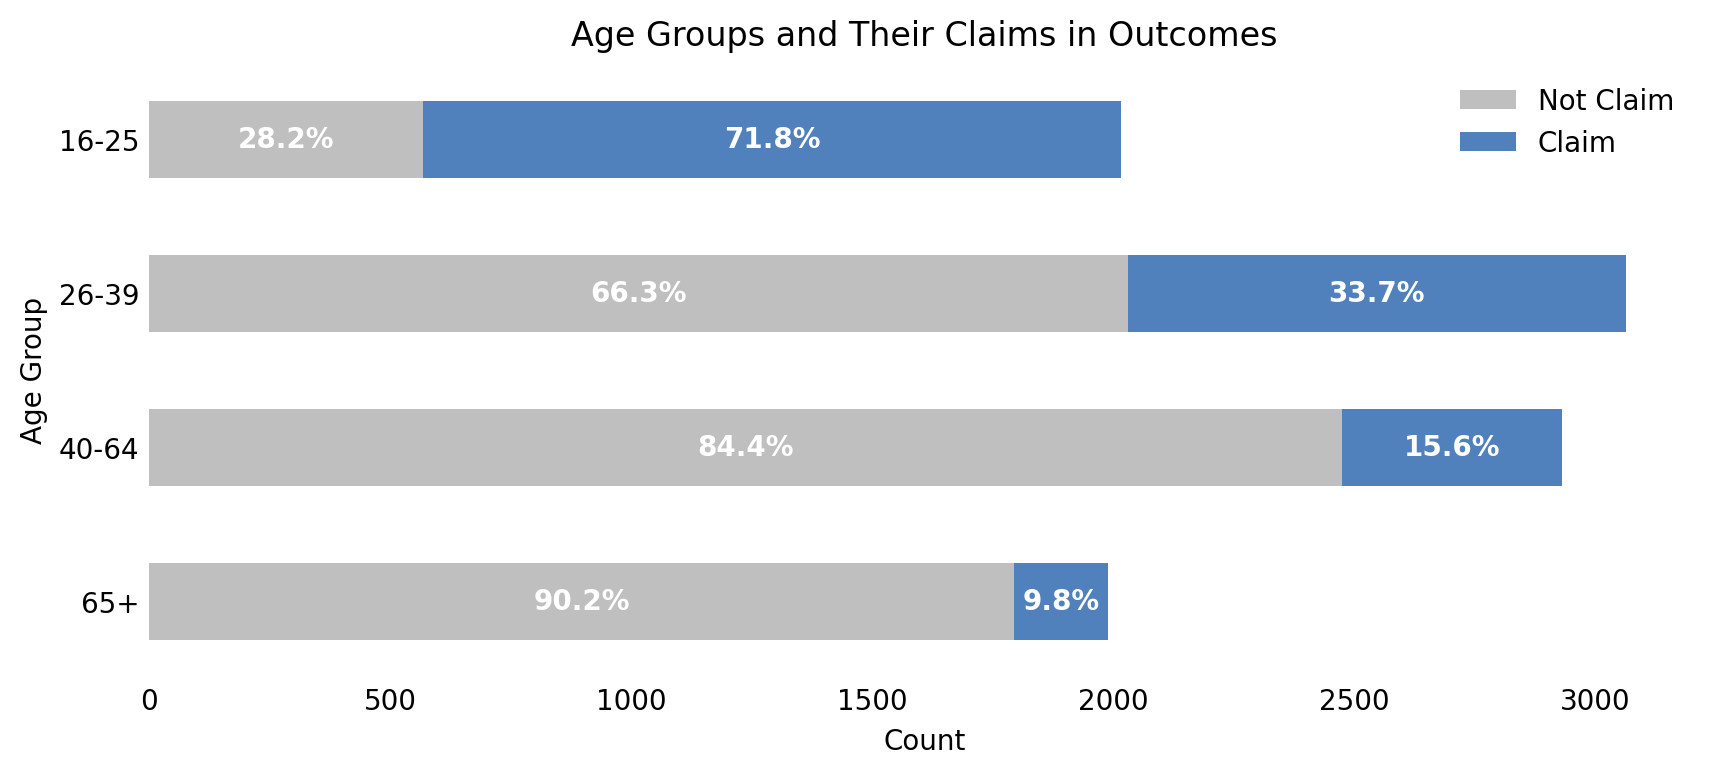

In [159]:
# Count occurrences of each combination of age and outcome
count_data = df.groupby(['age', 'outcome']).size().unstack(fill_value=0)

# Specify the order of age groups if needed (you can modify this based on your actual data)
# For example, if you want to categorize into age groups like "18-24", "25-34", etc.
# Here we will use direct age values for simplicity
# desired_order = [18, 25, 30, 35]  # Example age groups
# count_data = count_data.reindex(desired_order)

# Plotting
plt.figure(figsize=(10, 4), dpi=200)

# Create the stacked bar chart
ax = count_data.plot(kind='barh', stacked=True, ax=plt.gca(), color=[grey, blue])

# Show percentage inside each hue
for i in range(count_data.shape[0]):
    total_count = count_data.iloc[i].sum()  # Total count for the row
    for j in range(count_data.shape[1]):
        if count_data.iloc[i, j] > 0:
            percentage = (count_data.iloc[i, j] / total_count) * 100
            x_pos = count_data.iloc[i, :j].sum() + count_data.iloc[i, j] / 2
            ax.text(x_pos, i, f'{percentage:.1f}%', ha='center', va='center', color='white', fontweight='bold')  # Make percentage bold

# Customize the plot
plt.title('Age Groups and Their Claims in Outcomes')
plt.xlabel('Count')
plt.ylabel('Age Group')

# Capitalize y-tick labels (if ages are not integers, customize as needed)
ax.set_yticklabels([str(label) for label in count_data.index])

# Update legend and remove border
plt.legend(labels=['Not Claim', 'Claim'], frameon=False)
plt.xticks(rotation=0)
plt.gca().invert_yaxis()

# Remove left and bottom spines and their ticks
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='both', which='both', length=0)

# Show the plot
plt.show()

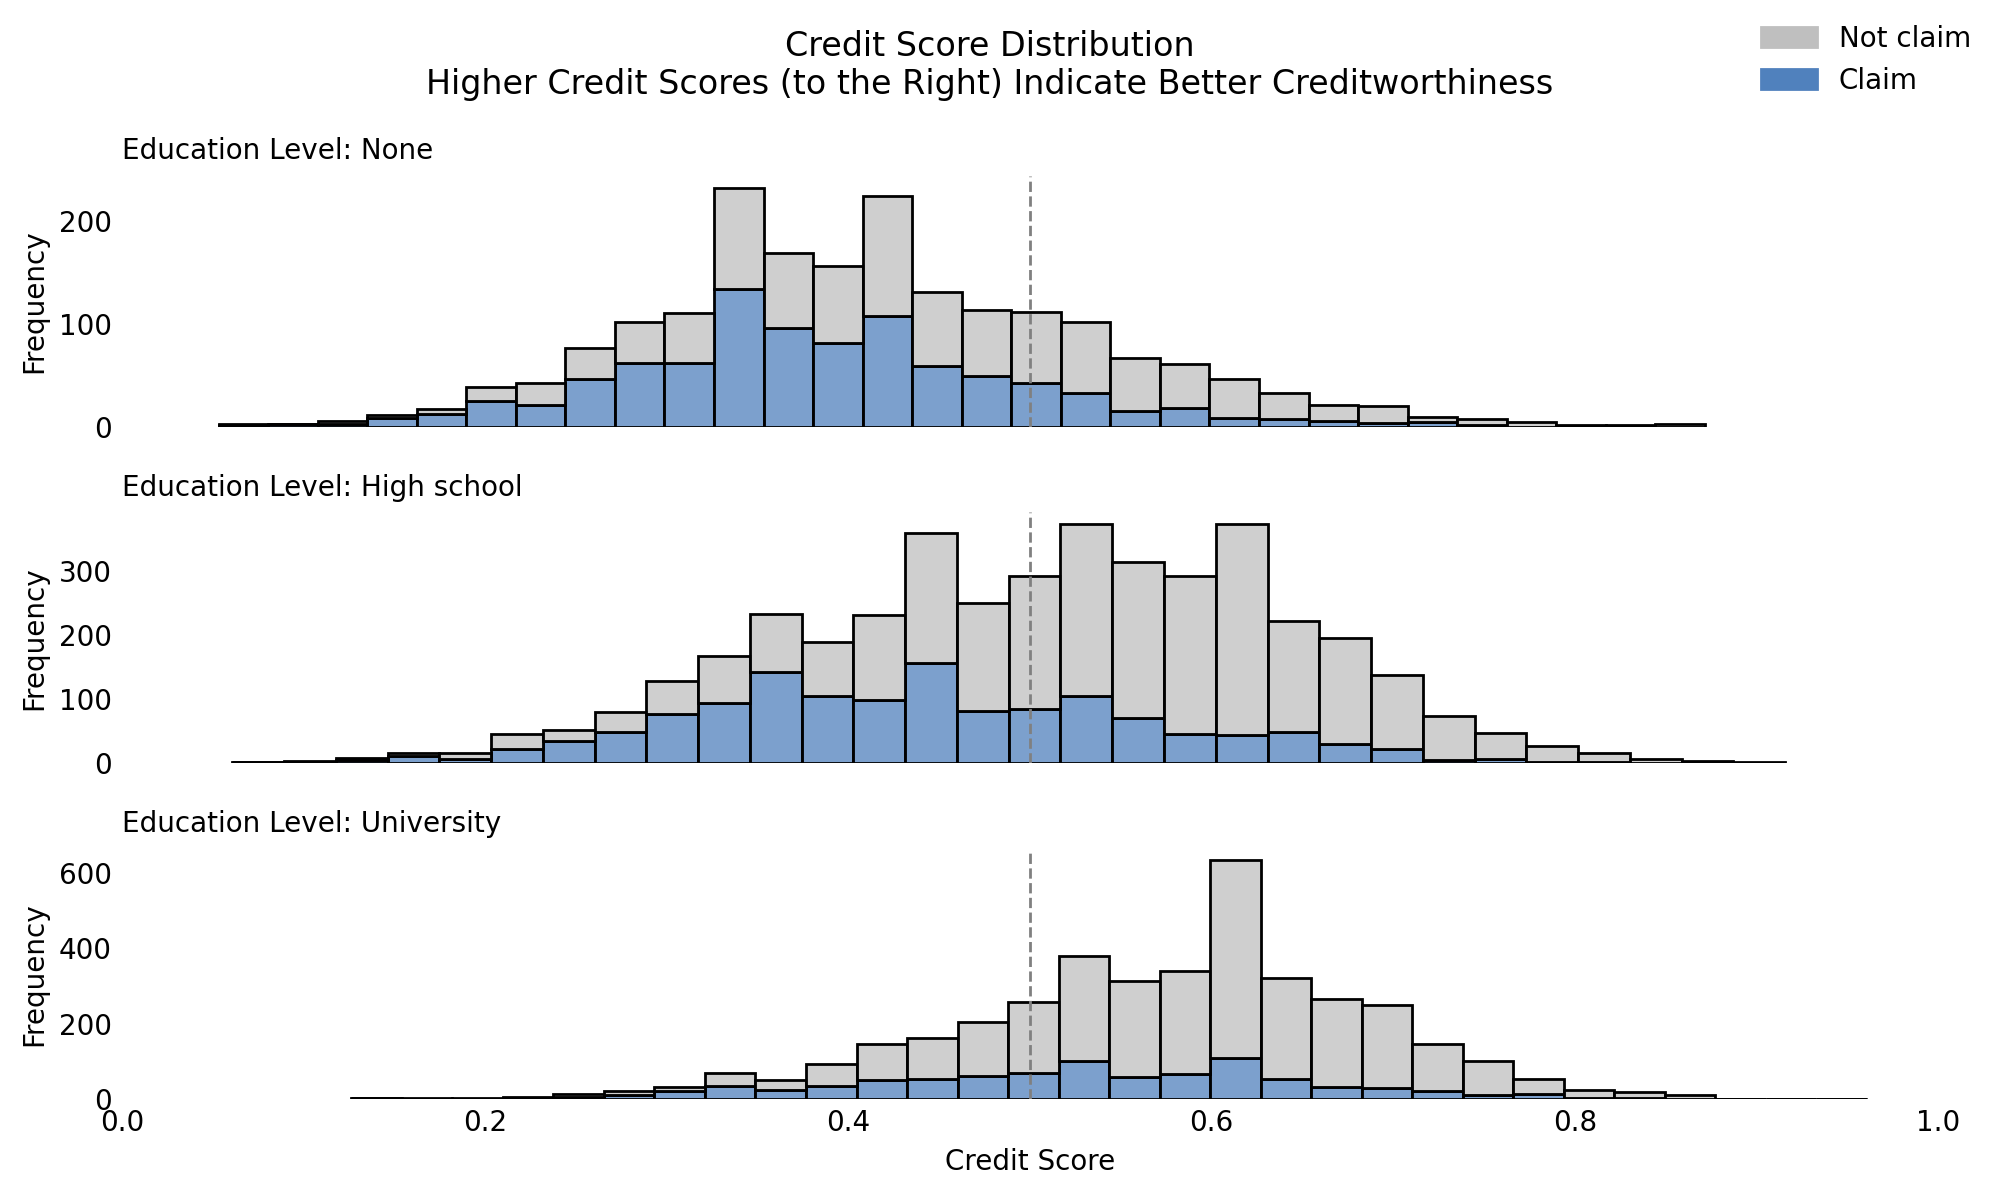

In [160]:
# Create the subplots
education_levels = ["none", "high school", "university"]
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 6), dpi=200, sharex=True)

# Custom color palette with boolean keys
color_palette = {True: blue, False: grey}

# Loop through each education level and create a histogram
for i, edu in enumerate(education_levels):
    ax = axes[i]
    
    # Create the histogram
    sns.histplot(
        data=df[df['education'] == edu], 
        x="credit_score", 
        hue="outcome",
        multiple="stack",
        palette=color_palette,
        ax=ax, 
        bins=30,
        legend=False  # Disable automatic legend
    )
    
    # Add a vertical dashed line at x=0.5
    ax.axvline(x=0.5, color='grey', linestyle='--', linewidth=1)
    
    # Customize the plot
    ax.set_title(f'Education Level: {edu.capitalize()}', fontsize=10, ha='left', x=0)
    ax.set_xlim(0, 1)
    ax.set_xlabel('')  # Remove x-label for all but the bottom plot
    ax.set_ylabel('Frequency')
    
    # Remove spines and tick marks
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.tick_params(axis='both', which='both', length=0)

# Add x-label only to the bottom plot
axes[-1].set_xlabel('Credit Score')

# Create custom legend
legend_patches = [
    mpatches.Patch(color=grey, label='Not claim'),
    mpatches.Patch(color=blue, label='Claim')
]

# Add the custom legend to the figure
fig.legend(handles=legend_patches, loc='upper right', frameon=False)

# Adjust layout for better spacing
plt.suptitle("Credit Score Distribution\nHigher Credit Scores (to the Right) Indicate Better Creditworthiness")
plt.tight_layout()

plt.show()
